In [6]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import requests
import json
import sys
sys.path.append('../bgc-analysis')
import numpy as np
from datetime import datetime
from calc_sensor import mcoms
from get_cal_sn import get_cal

In [3]:
SN = 1528 #Update for each float
root = '/Users/katttdaddyyyy/Library/CloudStorage/GoogleDrive-katherine.parise@whoi.edu'
filelocation = root + '/Shared drives/WHOI Argo/BGC/Float Tracking/' + 'pressure_test_results/' + 'combined_test_results/' + str(SN) + '_pressure_test_results' + ".xlsx"
df = pd.read_excel(filelocation)
display(df)

,Unnamed: 0,DATE,BUOYANCY_POSITION,ITERATION,HUMIDITY,PRES,TEMP,PSAL,O2_PHASE_DELAY,O2_TEMPERATURE_VOLTAGE,...,MCOMS2,MCOMS3,PH_VRS1,PH_VRS,PH_VK,PH_IK,PH_IB,PH_VIN,PH_VOUT,SN
0,0,2023-05-17 11:18:38,743,1,5.16,1965.0,20.9445,32.704,18.028,0.624437,...,48610,247,-0.904074,-0.904229,-1.004241,-5.180000e-08,-1.880000e-08,7.06,7.03,1528
1,1,2023-05-17 11:20:06,719,2,5.11,1929.3,20.9282,32.707,17.847,0.624773,...,48560,248,-0.904516,-0.904489,-1.004393,-4.970000e-08,-1.640000e-08,7.06,7.03,1528
2,2,2023-05-17 11:21:01,703,2,5.08,1904.8,20.9193,32.707,17.800,0.624942,...,48480,246,-0.904771,-0.904723,-1.004437,-4.880000e-08,-1.780000e-08,7.06,7.03,1528
3,3,2023-05-17 11:21:55,703,2,5.08,1878.5,20.9089,32.708,17.803,0.625141,...,48500,245,-0.904917,-0.904851,-1.004371,-4.870000e-08,-1.660000e-08,7.06,7.03,1528
4,4,2023-05-17 11:22:50,703,2,5.08,1851.3,20.9000,32.707,17.809,0.625330,...,48450,248,-0.904994,-0.904993,-1.004325,-4.880000e-08,-1.630000e-08,7.06,7.03,1528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,1339,2023-05-18 12:48:23,33,10,5.11,1413.3,20.7613,32.752,18.331,0.628131,...,49680,239,-0.917328,-0.917385,-1.024725,-4.200000e-08,-1.900000e-08,7.06,7.03,1528
1340,1340,2023-05-18 12:49:18,33,10,5.16,1601.5,20.8087,32.752,18.355,0.627215,...,49540,240,-0.917737,-0.917821,-1.025025,-4.380000e-08,-1.630000e-08,7.06,7.03,1528
1341,1341,2023-05-18 12:50:12,32,10,5.21,1787.3,20.8521,32.752,18.384,0.626341,...,49500,240,-0.918137,-0.918134,-1.025241,-4.280000e-08,-1.680000e-08,7.06,7.03,1528
1342,1342,2023-05-18 12:51:07,33,10,5.24,1975.5,20.8938,32.753,18.416,0.625467,...,49350,238,-0.918395,-0.918484,-1.025410,-4.470000e-08,-1.860000e-08,7.06,7.03,1528


In [7]:
meta = get_cal(SN)
meta

,CTD_CNDC,CTD_PRES,CTD_TEMP,OPTODE_DOXY,FLUOROMETER_CDOM,FLUOROMETER_CHLA,BACKSCATTERINGMETER_BBP700,SPECTROPHOTOMETER_NITRATE,TRANSISTOR_PH
SENSOR_MAKER,SBE,DRUCK,SBE,SBE,WETLABS,WETLABS,WETLABS,SATLANTIC,SBE
SENSOR_MODEL,SBE41CP_V5.3.5,DRUCK_2900PSIA,SBE41CP_V5.3.5,SBE63_V3.2.2,MCOMS_FLBBCD,MCOMS_FLBBCD,MCOMS_FLBBCD,SUNA_V2,SEAFET
SENSOR_SERIAL_NO,18947,12263199,18947,3419,419,419,419,2068,720-12256
SENSOR_CALIB_DATE,2023-03-12,2023-03-16,2023-03-12,2023-03-08,None,None,None,None,2023-03-14
COMMENTS,None,None,None,None,,,,None,REF SN: 12246; added calibration date; added K0
PREDEPLOYMENT_CALIB_EQUATION,{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None}
PREDEPLOYMENT_CALIB_COEFFICIENT,"{'G': -1.01677, 'H': 0.1431673, 'I': -0.000169...","{'PA0': 0.2982393, 'PA1': 0.0003909299, 'PA2':...","{'TA0': -0.0008992448, 'TA1': 0.0003029106, 'T...","{'E': 0.011, 'A0': 1.0513, 'A1': -0.0015, 'A2'...","{'DARK_CDOM': 50, 'SCALE_CDOM': 0.04084}","{'DARK_CHLA': 49, 'SCALE_CHLA': 0.002349}","{'KHI': 1.097, 'BETASW700': 'calculated at 124...","{'NO3': [-0.00022323, 0.00585584, 0.00472827, ...","{'F0': -1.332894357998, 'F1': 8.811211536684e-..."


In [8]:
cal  = meta["FLUOROMETER_CDOM"].PREDEPLOYMENT_CALIB_COEFFICIENT
cal


{'DARK_CDOM': 50, 'SCALE_CDOM': 0.04084}

In [32]:
fcdom = mcoms(scale=(cal["SCALE_CDOM"]),dark=(cal["DARK_CDOM"]),counts=(df["MCOMS1"]))
fcdom 
fchla = mcoms(scale=(cal["SCALE_CDOM"]),dark=(cal["DARK_CDOM"]),counts=(df["MCOMS2"]))
fchla 
bbp = mcoms(scale=(cal["SCALE_CDOM"]),dark=(cal["DARK_CDOM"]),counts=(df["MCOMS3"]))
bbp
time = pd.to_datetime(df['DATE'])
#print(time)
#print(fcdom)
data = pd.concat([fcdom,fchla,bbp], axis=1)
data


,MCOMS1,MCOMS2,MCOMS3
0,1.06184,1983.1904,8.04548
1,1.10268,1981.1484,8.08632
2,0.98016,1977.8812,8.00464
3,0.98016,1978.6980,7.96380
4,1.14352,1976.6560,8.08632
...,...,...,...
1339,1.02100,2026.8892,7.71876
1340,1.06184,2021.1716,7.75960
1341,1.02100,2019.5380,7.75960
1342,0.93932,2013.4120,7.67792


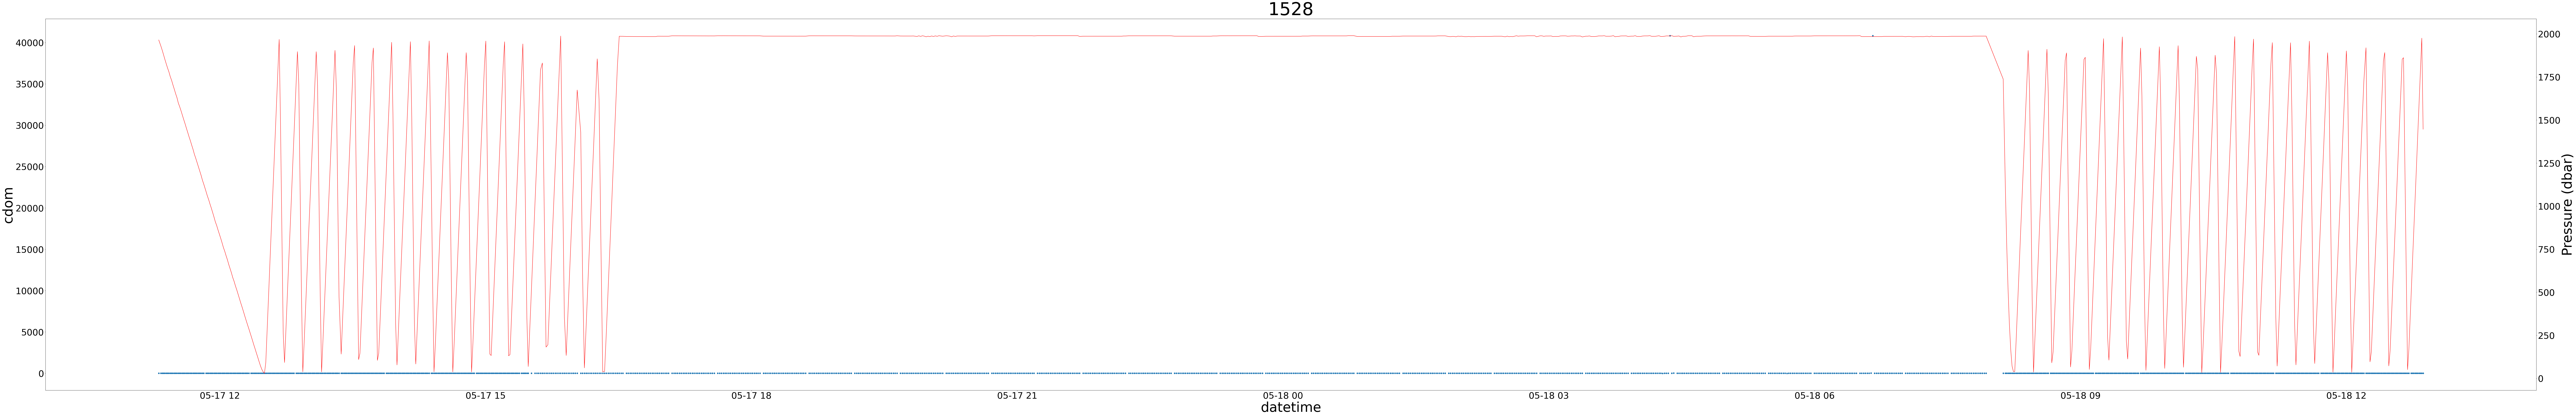

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(200, 30)
ax.plot_date(time, fcdom)
ax.set_title(SN, fontsize = 80)
ax.set_xlabel('datetime', fontsize = 60)
ax.set_ylabel('cdom', fontsize = 60)
ax2 = ax.twinx()
ax2.plot(time, df['PRES'], color = 'red', linestyle = '-' )
ax2.set_ylabel('Pressure (dbar)', fontsize = 60)
ax.tick_params(axis= 'both', which = 'major', labelsize = 40)
ax2.tick_params(axis= 'both', which = 'major', labelsize = 40)


(array([19494.5  , 19494.625, 19494.75 , 19494.875, 19495.   , 19495.125,
        19495.25 , 19495.375, 19495.5  ]),
 [Text(19494.5, 0, '05-17 12'),
  Text(19494.625, 0, '05-17 15'),
  Text(19494.75, 0, '05-17 18'),
  Text(19494.875, 0, '05-17 21'),
  Text(19495.0, 0, '05-18 00'),
  Text(19495.125, 0, '05-18 03'),
  Text(19495.25, 0, '05-18 06'),
  Text(19495.375, 0, '05-18 09'),
  Text(19495.5, 0, '05-18 12')])

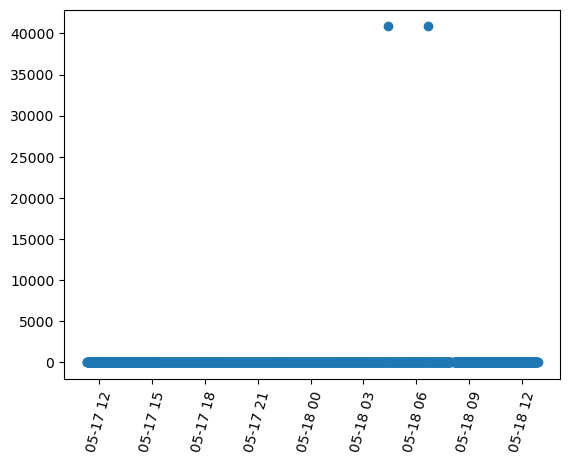

In [21]:
plt.scatter(time,fcdom)
plt.xticks(rotation =75)